In [1]:
import pandas as pd

df = pd.read_csv('./data/november_raw_data.csv')

print(df.tail())


       Departure Airport       Departure Time Arrival Airport  \
287141               DLI  2024-11-30T22:50:00             HAN   
287142               HAN  2024-12-01T07:15:00             BMV   
287143               DLI  2024-11-30T20:15:00             HAN   
287144               HAN  2024-12-01T15:35:00             BMV   
287145               DLI  2024-11-30T12:50:00             SGN   

               Arrival Time Carrier Code  Flight Number  Price (VND) Duration  
287141  2024-12-01T00:40:00           W2           4402    3950000.0  PT1H50M  
287142  2024-12-01T09:00:00           W2           4491    3950000.0  PT1H45M  
287143  2024-11-30T22:05:00           W2           4412    3950000.0  PT1H50M  
287144  2024-12-01T17:20:00           W2           4495    3950000.0  PT1H45M  
287145  2024-11-30T14:00:00           VN           1383    4115000.0  PT1H10M  


In [2]:
df['Routine'] = df['Departure Airport'] + '-' + df['Arrival Airport']

df = df.drop(columns=['Flight Number', 'Duration', 'Departure Airport', 'Arrival Airport', 'Arrival Time'])

df.head()

,Departure Time,Carrier Code,Price (VND),Routine
0,2024-11-01T05:00:00,VJ,1546000.0,SGN-HAN
1,2024-11-01T05:20:00,VJ,1546000.0,SGN-HAN
2,2024-11-01T06:00:00,VJ,1546000.0,SGN-HAN
3,2024-11-01T06:30:00,VJ,1546000.0,SGN-HAN
4,2024-11-01T07:30:00,VJ,1546000.0,SGN-HAN


C:\Users\Tran Dinh Gia\AppData\Local\Temp\ipykernel_8996\1146058789.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_september['Day'] = df_september['Departure Time'].dt.day


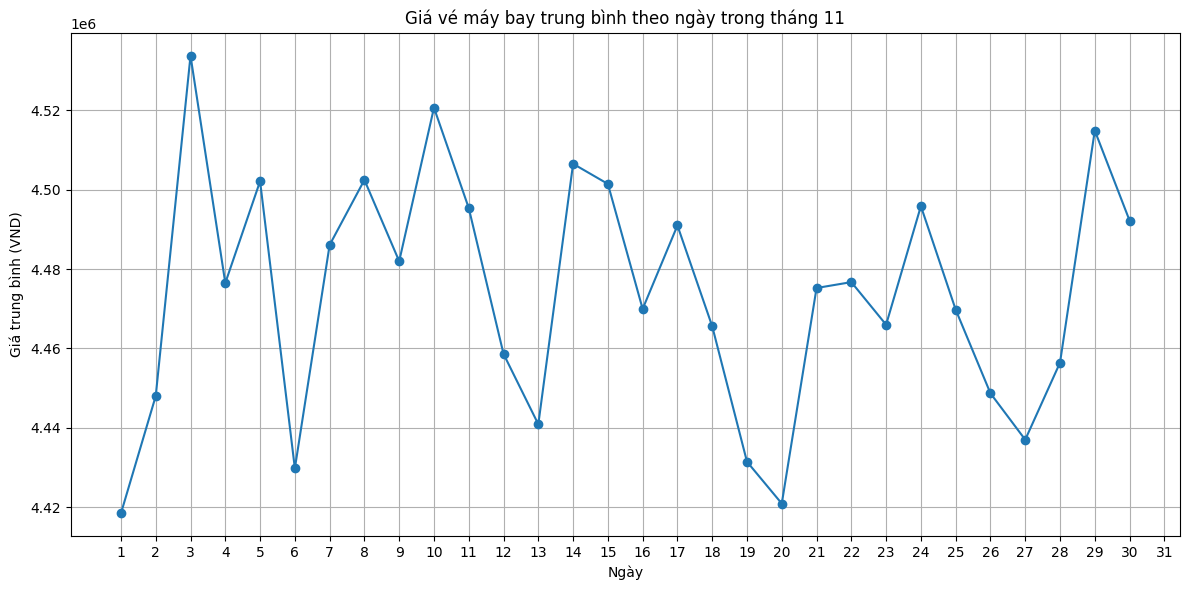

Giá vé trung bình theo ngày trong tháng 11:
    Day   Price (VND)
0     1  4.418494e+06
1     2  4.448029e+06
2     3  4.533698e+06
3     4  4.476475e+06
4     5  4.502098e+06
5     6  4.429816e+06
6     7  4.486057e+06
7     8  4.502431e+06
8     9  4.481961e+06
9    10  4.520610e+06
10   11  4.495352e+06
11   12  4.458622e+06
12   13  4.440917e+06
13   14  4.506488e+06
14   15  4.501421e+06
15   16  4.469953e+06
16   17  4.490958e+06
17   18  4.465590e+06
18   19  4.431486e+06
19   20  4.420952e+06
20   21  4.475220e+06
21   22  4.476703e+06
22   23  4.465978e+06
23   24  4.495830e+06
24   25  4.469776e+06
25   26  4.448714e+06
26   27  4.437030e+06
27   28  4.456420e+06
28   29  4.514850e+06
29   30  4.492204e+06


In [3]:
import matplotlib.pyplot as plt

df['Departure Time'] = pd.to_datetime(df['Departure Time'])

df_september = df[df['Departure Time'].dt.month == 11]

df_september['Day'] = df_september['Departure Time'].dt.day

daily_avg_price = df_september.groupby('Day')['Price (VND)'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_price['Day'], daily_avg_price['Price (VND)'], marker='o')
plt.title('Giá vé máy bay trung bình theo ngày trong tháng 11')
plt.xlabel('Ngày')
plt.ylabel('Giá trung bình (VND)')
plt.xticks(range(1, 32))
plt.grid(True)
plt.tight_layout()
plt.show()

print("Giá vé trung bình theo ngày trong tháng 11:")
print(daily_avg_price)


In [4]:
df_vj_sgn_hui = df[(df['Carrier Code'] == 'VJ') & (df['Routine'] == 'SGN-HUI')]

print(df_vj_sgn_hui.head())


         Departure Time Carrier Code  Price (VND)  Routine
71  2024-11-01 20:30:00           VJ    2327000.0  SGN-HUI
404 2024-11-01 06:10:00           VJ    1223000.0  SGN-HUI
405 2024-11-01 08:35:00           VJ    1223000.0  SGN-HUI
406 2024-11-01 11:20:00           VJ    1223000.0  SGN-HUI
407 2024-11-01 15:15:00           VJ    1223000.0  SGN-HUI


In [5]:
df_vj_sgn_hui['Departure Time'] = pd.to_datetime(df_vj_sgn_hui['Departure Time'])

df_vj_sgn_hui['Departure Day'] = df_vj_sgn_hui['Departure Time'].dt.day

df_vj_sgn_hui['Departure Hour'] = df_vj_sgn_hui['Departure Time'].dt.hour + df_vj_sgn_hui['Departure Time'].dt.minute / 60

df_vj_sgn_hui_processed = df_vj_sgn_hui.drop(['Departure Time', 'Carrier Code', 'Routine'], axis=1)

print("Dữ liệu df_vj_sgn_hui sau khi xử lý:")
print(df_vj_sgn_hui_processed.head())

df_vj_sgn_hui_processed.shape


Dữ liệu df_vj_sgn_hui sau khi xử lý:
     Price (VND)  Departure Day  Departure Hour
71     2327000.0              1       20.500000
404    1223000.0              1        6.166667
405    1223000.0              1        8.583333
406    1223000.0              1       11.333333
407    1223000.0              1       15.250000


C:\Users\Tran Dinh Gia\AppData\Local\Temp\ipykernel_8996\3242003715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vj_sgn_hui['Departure Time'] = pd.to_datetime(df_vj_sgn_hui['Departure Time'])
C:\Users\Tran Dinh Gia\AppData\Local\Temp\ipykernel_8996\3242003715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vj_sgn_hui['Departure Day'] = df_vj_sgn_hui['Departure Time'].dt.day
C:\Users\Tran Dinh Gia\AppData\Local\Temp\ipykernel_8996\3242003715.py:5: SettingWithCopyWarning: 
A value is trying t

(2146, 3)

(2146, 3)


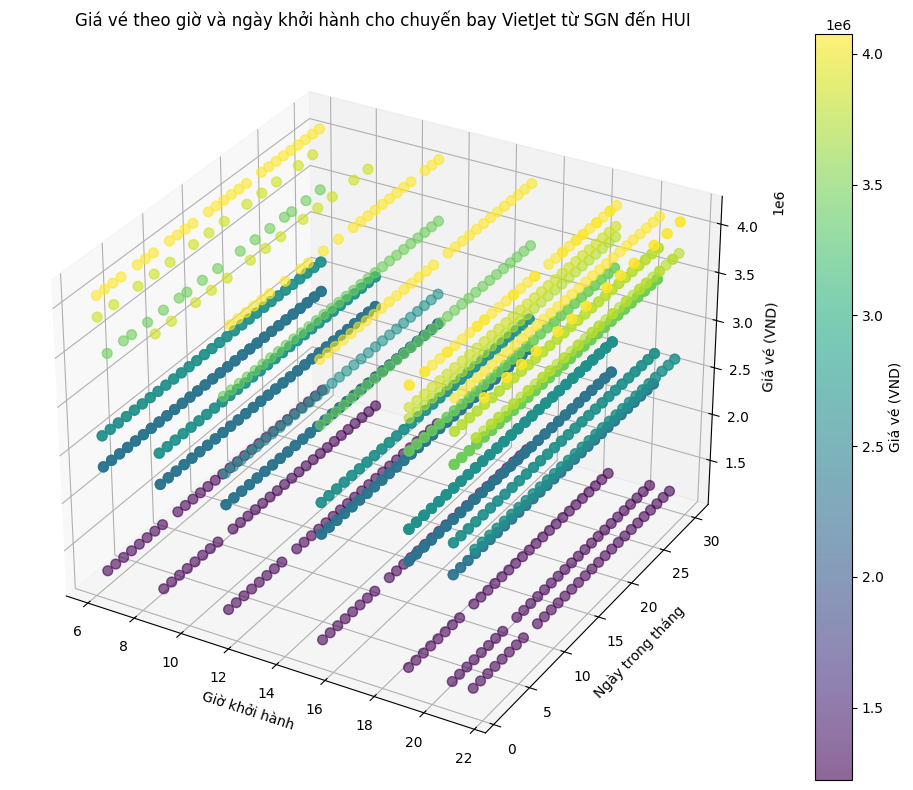

In [6]:
df_train = df_vj_sgn_hui_processed
print(df_train.shape)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_train['Departure Hour'], 
                     df_train['Departure Day'], 
                     df_train['Price (VND)'],
                     c=df_train['Price (VND)'],  # Màu sắc dựa trên giá vé
                     cmap='viridis',
                     s=50,  # Kích thước điểm
                     alpha=0.6)  # Độ trong suốt

ax.set_xlabel('Giờ khởi hành')
ax.set_ylabel('Ngày trong tháng')
ax.set_zlabel('Giá vé (VND)')

ax.set_title('Giá vé theo giờ và ngày khởi hành cho chuyến bay VietJet từ SGN đến HUI')

cbar = fig.colorbar(scatter)
cbar.set_label('Giá vé (VND)')

plt.tight_layout()
plt.show()



In [7]:
from sklearn.model_selection import train_test_split

# df_train = df_train[df_train['Departure Day'] == 1]
X = df_train.drop('Price (VND)', axis=1) 
y = df_train['Price (VND)'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Kết quả đánh giá mô hình KNN với k = 68:
RMSE: 747620.87
R2 Score: 0.03


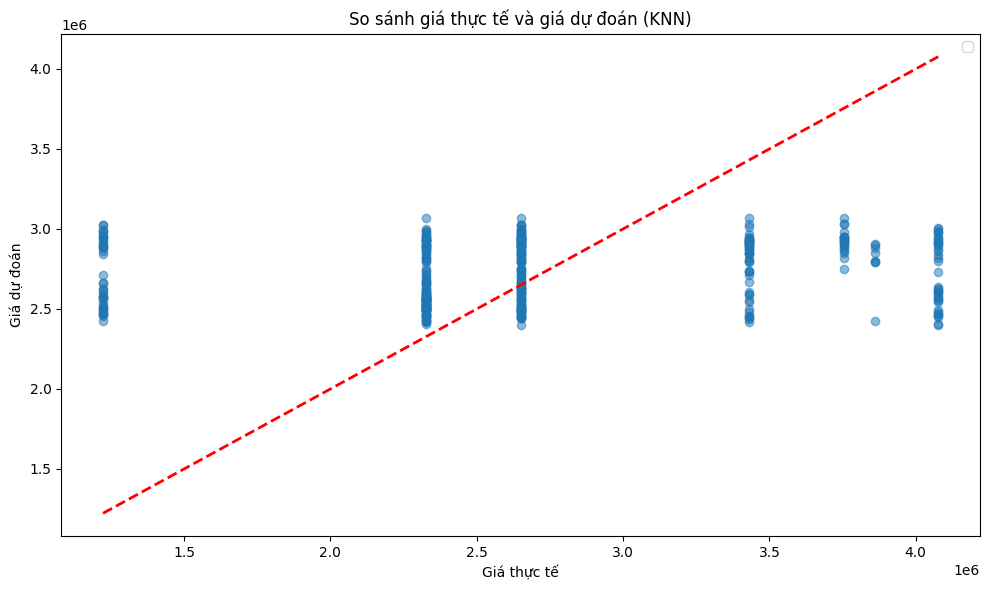

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

knn_model = KNeighborsRegressor(n_neighbors=68)

# Huấn luyện mô hình
knn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("Kết quả đánh giá mô hình KNN với k = 68:")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.title("So sánh giá thực tế và giá dự đoán (KNN)")
plt.legend()
plt.tight_layout()
plt.show()
